In [46]:
import pyext.src.poissonsqr as sqr
import jax
import jax.numpy as jnp
import jax.scipy as jsp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
%matplotlib inline

In an AP-MS pulldown, the protein spectral counts $x$ of protein $i$ is the sum of the peptide spectral counts from that protein.
$$x_i = \sum_{s}^{t} x_{i, s} = \sum_{s}^{t} \phi_{s, i}(n_{s})$$

The peptide spectral counts function $\phi_{s, i}$ can be modeled as
$$x_s = \phi_s(n_s) $$  

$$ x_s = r_sn_i\alpha_s + b_s $$

$$ n_i = \frac{x_i}{\sum_{s}^{t} \alpha_s r_s} $$  

Assume $b_s = 0$  

$$ n_i \propto x_i $$
$n_{s} = n_i\alpha_s$  
$n_i$ : count (nmol)
$\alpha_s$ : stochiometric coefficient $(\frac{\text{mol peptide } s}{\text{mol protein } i})$  

$r_s$ : sc / peptide

$$r_s ~ p(r_s)$$



In [12]:
def load_cullin_data():
    path = "data/cullin_e3_ligase/1-s2.0-S1931312819302537-mmc2.xlsx"
    df = pd.read_excel(path)
    xf = pd.ExcelFile(path)
    return df , xf

In [18]:
def parse_spec_counts_column(col, delimiter="|"):
    l = []
    for countstr in col:
        l.append(np.array(
        list(map(int, countstr.split(delimiter)))))
        
    return l

def apply_to_colstr(f, col, delimiter="|"):
    col_list = parse_spec_counts_column(col, delimiter)
    return list(map(f, col_list))
    

In [129]:
s1 = xf.parse(sheet_name=5)
s1

,Protein,Label,log2FC,SE,Tvalue,DF,pvalue,adj.pvalue,validated interactor
0,BAG3,CBFBmock-control,1.986785,0.279768,7.101544,12,1.245029e-05,2.290854e-04,1
1,BCL11B,CBFBmock-control,2.547897,0.714804,3.564468,12,3.891756e-03,2.106127e-02,1
2,CBFB,CBFBmock-control,10.481636,0.334848,31.302693,12,7.112089e-13,6.543122e-11,1
3,EMD,CBFBmock-control,2.564410,0.607606,4.220513,12,1.187822e-03,1.092796e-02,1
4,ETS1,CBFBmock-control,2.567894,0.667588,3.846524,12,2.324776e-03,1.645226e-02,1
...,...,...,...,...,...,...,...,...,...
277,TUBB3,CBFBwt-control,1.027613,0.427393,2.404375,12,3.325228e-02,7.018223e-02,0
278,UHRF1,CBFBwt-control,0.704509,0.573146,1.229197,12,2.425563e-01,3.984853e-01,0
279,USP9X,CBFBwt-control,0.478847,0.230229,2.079872,12,5.963648e-02,1.143032e-01,0
280,ZNF24,CBFBwt-control,-0.442672,0.410423,-1.078574,12,3.019812e-01,4.534248e-01,0


In [73]:
# Globals
df, xf = load_cullin_data()
mean = apply_to_colstr(np.mean, df['Spec'])
var = apply_to_colstr(np.var, df['Spec'])

r_spear, p_spear = sp.stats.spearmanr(mean, var)
r_pears, p_pears = sp.stats.pearsonr(mean, var)

In [107]:
def show_scatter_plot(x, y, xlabel, ylabel, decimals=2, xlim=(0, 200), ylim=(0, 200), transform=True, text_pos=(1, 1)):
    width=8
    length=8
    fig, ax = plt.subplots(figsize=(width, length))
    plt.plot(x, y, 'k.')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    trans = ax.transAxes if transform else None
    
    r_spear, p_spear = sp.stats.spearmanr(x, y)
    r_pears, p_pears = sp.stats.pearsonr(x, y)
    
    
    plt.text(x=text_pos[0], 
             y=text_pos[1], 
             s=f"spear: r {r_spear.round(decimals)} p {p_spear.round(decimals)}\npears: r {r_pears.round(decimals)} p {p_pears.round(decimals)}",
             transform=trans)
    plt.show()
    
def filter_out_nan_inf(x, y):
    outs = []
    out_pos = []
    
    

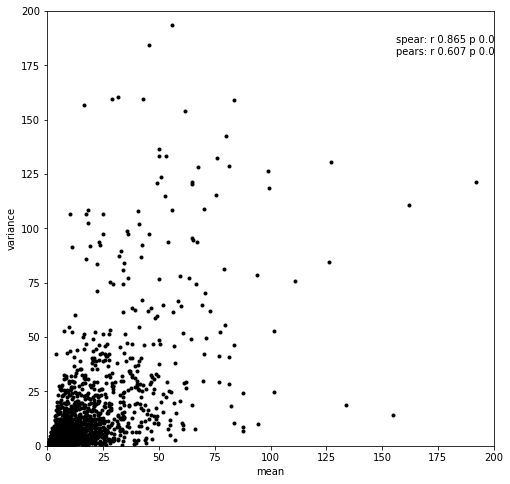

In [110]:
show_scatter_plot(mean, var, 'mean', 'variance', text_pos=(0.78, 0.9), decimals=3)

/tmp/ipykernel_735937/172450553.py:1: RuntimeWarning: divide by zero encountered in log
  show_scatter_plot(np.log(mean), np.log(var), 'log mean', 'log var', xlim=(-6, 6), ylim=(-6, 6))
/home/aji/anaconda3/envs/pynetp3.10.0/lib/python3.10/site-packages/scipy/stats/stats.py:4039: RuntimeWarning: invalid value encountered in subtract
  xm = x.astype(dtype) - xmean
/home/aji/anaconda3/envs/pynetp3.10.0/lib/python3.10/site-packages/scipy/stats/stats.py:4040: RuntimeWarning: invalid value encountered in subtract
  ym = y.astype(dtype) - ymean


ValueError: array must not contain infs or NaNs

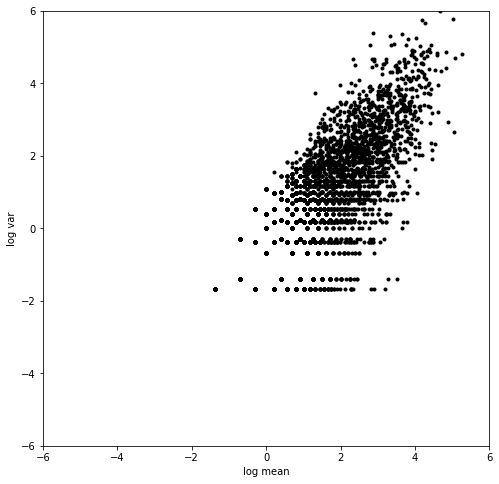

In [111]:
show_scatter_plot(np.log(mean), np.log(var), 'log mean', 'log var', xlim=(-6, 6), ylim=(-6, 6))

/tmp/ipykernel_735937/795439036.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(mean), np.log(var), '.k')


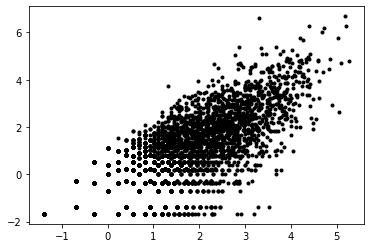

In [116]:
plt.plot(np.log(mean), np.log(var), '.k')
plt.show()

In [16]:
def rigorous_definition_of_spectral_counts():
    """
    Protein spectral counts per sample are the sum of all the peptide spectral counts
    in that sample.
    
    
    
    """
    ...

def set_up_simulation_examples():
    ...
    
def simulation1_simple2x2_independant():
    ...
    
def simulation2_simple2x2_positive_correlation():
    ...
    
def simulation3_simple2x2_negative_dependance():
    ...
    

def set_up_modeling_methods():
    ...
    
def method1_approximate_Zas1():
    ...
    
def method2_approximate_ZusingAIS():
    ...
    
def method3_simulate_data():
    ...
    

def run_simulations():
    ...
    
def report_results():
    
    header = [["2x2_ind", "2x2_ind", "2x2_pos", "2x2_pos", "2x2_neg", "2x2_neg"],
               ["acc", "prec", "acc", "prec", "acc", "prec"]]
    
    rows = ["Z=1", "Z AIS", "y_sim"]
    
    df = pd.DataFrame([[11, 12, 13, 14, 15, 16], 
                       [21, 22, 23, 24, 25, 26], 
                       [31, 32, 33, 34, 35, 36]])
    df.columns = header
    df.index = rows
    
    color_params = [[{"background-color": "red"}, "2x2_ind"],
             [{"background-color": "green"}, "2x2_pos"],
             [{"background-color": "blue"}, "2x2_neg"]]
    
    cell_hover = {"selector": "td.hover",
                  "props": [("background-color", "#A84F4F")]
    }
    index_names = {"selector": ".index_name",
                   "props": "font-style: italix; color: darkgrey; font-weight:normal;"
    }
    headers = {"selector": "th:not(.index_name)",
                    "props": "background-color: #000066; color: white"}
    
    s = df.style
    s.set_table_styles([cell_hover, index_names, headers])
    
    return df
    
results = report_results()
results

2x2_ind      2x2_pos      2x2_neg     
          acc prec     acc prec     acc prec
Z=1        11   12      13   14      15   16
Z AIS      21   22      23   24      25   26
y_sim      31   32      33   34      35   36

In [3]:
results
s = results.style

In [4]:
header = [["a", "a", "b", "b"],
          ["a", "b", "c", "d"]]

df = pd.DataFrame([[1, 2, 3, 4], [5, 6, 7, 8]])
df.columns = header
df.index = ['a', 'b']
df

a     b   
   a  b  c  d
a  1  2  3  4
b  5  6  7  8

In [5]:
df = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, np.nan],[19, 439, 6, 452, 226,232]],
                  index=pd.Index(['Tumour (Positive)', 'Non-Tumour (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], names=['Model:', 'Predicted:']))
df.style.format(precision=2, na_rep="MISSING")